# Исследование данных о продажах игр

**Цель проекта** - выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**: исторические данные о продажах игр данные до 2016 года (данные за 2016 год могут быть неполными)
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://*****/datasets/games.csv')

In [2]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.isna().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

**Вывод:**
- датафрейм из 16715 строк и 11 столбцов
- дубликаты не обнаружены
- период исследования 1980 - 2016 гг.
- имеются пропуски
- проблемы с типами и названиями столбцов.

## Предобработка данных

### Приведем к нижнему регистру названия столбцов

In [8]:
df.columns = df.columns.str.lower()

### Обработаем пропуски

Посмотрим на `name` и `year_of_release`:

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Логически эти пропуски нечем заменить, удаляем из датафрейма:

In [11]:
df = df.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)

Посмотрим на `critic_score`:

In [12]:
df['critic_score'].value_counts(dropna=False)

NaN     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

Разберемся, откуда пропуски в столбце оценки критиков, возможно, эти пропуски в годы, когда оценки на игры ещё не ставили

In [13]:
df[df['critic_score'].isna()]['year_of_release'].value_counts().head(10)

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
Name: year_of_release, dtype: int64

В эти годы активность в интернете набирала обороты, значит проблема в другом. Посмотрим на каких платформах отсуствуют оценки:

In [14]:
df[df['critic_score'].isna()]['platform'].value_counts().head(10)

DS      1413
PS       994
PS2      852
PSP      737
Wii      718
PS3      502
GBA      381
3DS      346
X360     338
N64      316
Name: platform, dtype: int64

Практически все японские старые платформы, возможно тогда просто напросто не учитывались оценки критиков, оттсюда и пропуски.

В любом случае их нечем заменить, замена на медианную или среднюю сильно изменят данные, остаим как есть.

Посмотрим на `user_score`:

In [15]:
df['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
0.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

`tbd` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено), заменим их на `NaN`, и как с столбцом `critic_score` оставим как есть.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Посмотрим на `rating`:

In [17]:
df['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Посмотрим на каких платформах больше всего пропусков:

In [18]:
df[df['rating'].isna()]['platform'].value_counts().head(10)

PS     986
DS     866
PS2    671
PSP    657
PS3    371
N64    316
Wii    309
GBA    297
3DS    289
PSV    279
Name: platform, dtype: int64

Как и в столбце `critic_score`, больше всего японских, возможно, в Японии другие правила, и в рейтинге ESRB они не нуждаются.

Заменим пропуски на `other`:

In [19]:
df['rating'] = df['rating'].fillna('other')

### Преобразуем данные в нужные типы

После удаления пропусков, мы можем заменить `year_of_release` на целочисленные данные, а `user_score` на числа с плавающей запятой:

In [20]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

### Посчитаем суммарные продажи во всех регионах

 Создадим новый столбец и запишите туда сумму всех продаж:

In [21]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы

In [22]:
df.groupby(['year_of_release'])['genre'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: genre, dtype: int64

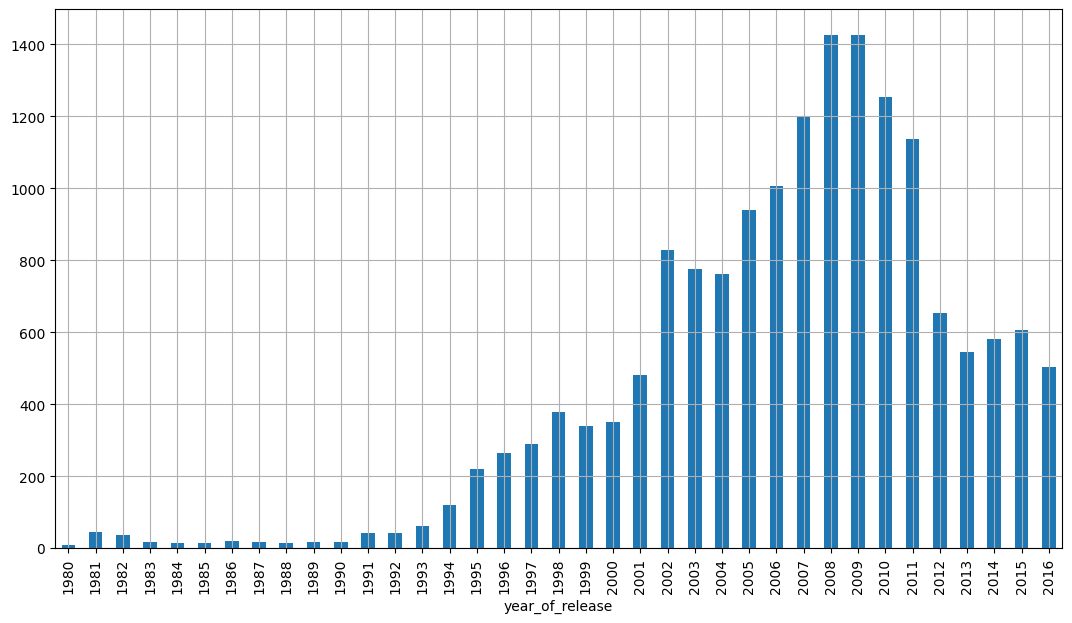

In [23]:
df.groupby(['year_of_release'])['genre'].count().plot(kind='bar', grid=True, figsize=(13, 7));

Мы видим, что мода попалась на 2008-2009 годы, после выпуск новых игр пошел на спад, новый рост можно заметить с 2013 года. Т.к. мы должны спрогнозировать 2017 год, нам нужно учитывать данные за последние годы.

### Посмотрим как менялись продажи по платформам

Посмотрим на 10 самых популярных платформ, по суммарным продажам, в нашем датафрейме:

In [24]:
df.groupby(['platform'])['genre'].count().sort_values(ascending=False).head(10)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: genre, dtype: int64

Построим распределение по годам:

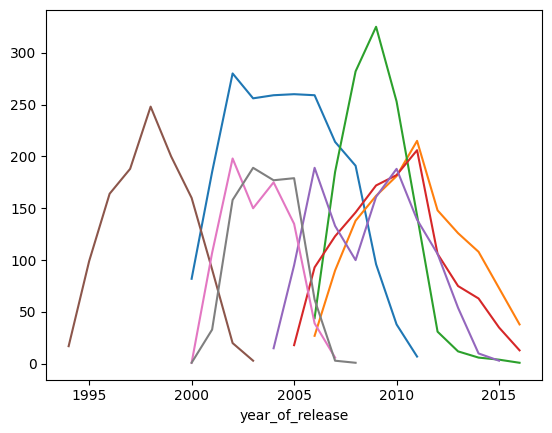

In [25]:
df.groupby(['platform', 'year_of_release'])['genre'].count()['PS2'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['PS3'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['Wii'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['X360'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['PSP'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['PS'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['GBA'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['XB'].plot();

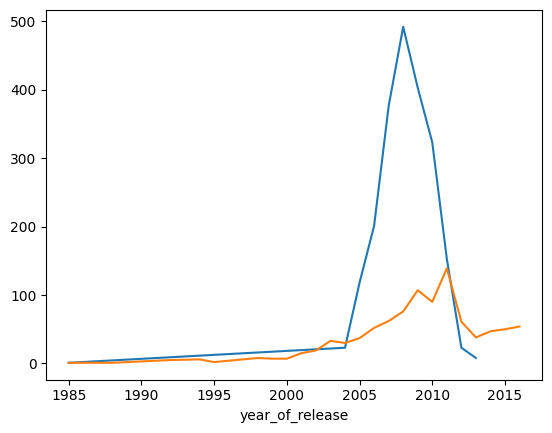

In [26]:
df.groupby(['platform', 'year_of_release'])['genre'].count()['DS'].plot();
df.groupby(['platform', 'year_of_release'])['genre'].count()['PC'].plot();

По графику видно, что актуальность платформы ~10 лет, кроме `PC`(актуальна всегда) и `DS`(был актуален до 2013 года).

### Посмотрим какие  платформы лидируют по продажам, растут или падают

Т.к. нам нужна актуальная информация, для прогноза на 2017 год, будем анализировать данные за 2013-2016 гг.

Создадим новую переменную `df2013`, где данные из `df` за нужный период:

In [27]:
df2013 = df.query('year_of_release >= 2013').reset_index(drop=True)
df2013

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,other,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,other,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01


У нас осталось 2233 строк.

Топ 10 платформ по продажам:

In [28]:
top_platform = df2013.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False).head(10)
top_platform

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: sum_sales, dtype: float64

Посмотрим общие продажи по топ 10 платформам за 2013-2015 гг.(2016 год не берём, т.к. данные не полные):

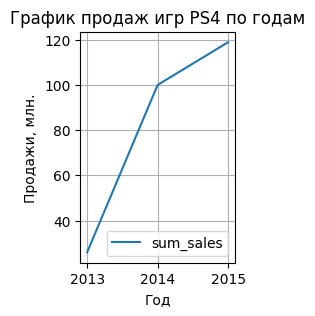

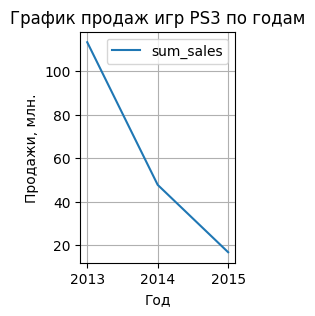

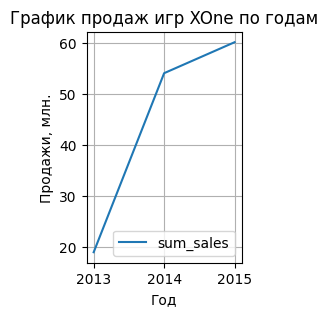

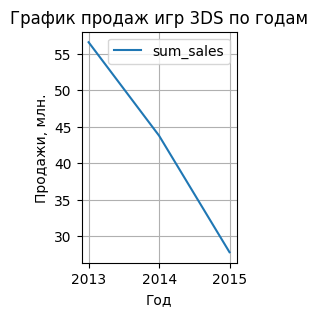

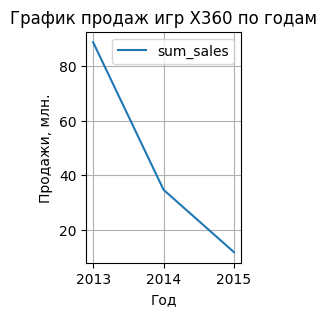

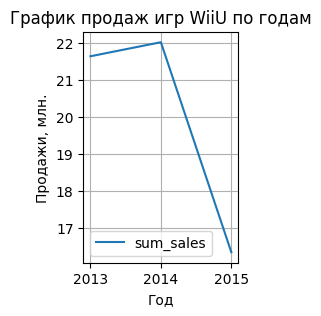

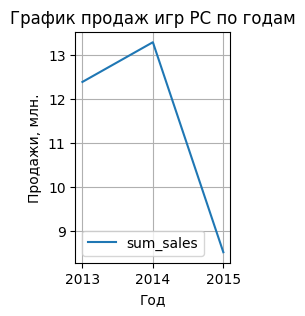

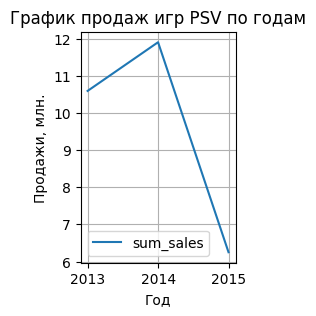

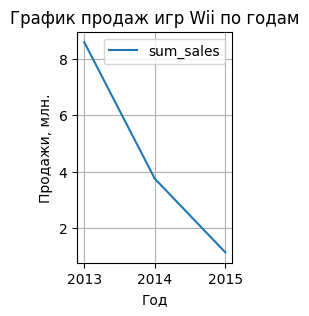

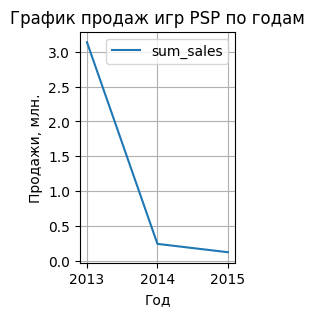

In [29]:
df_for_plot = df2013.query('2013 <= year_of_release < 2016') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg(sum_sales=('sum_sales', 'sum'))

for i in top_platform.index.unique():
    df_for_plot[df_for_plot['platform'] == i] \
        .pivot_table(index='year_of_release', values=['sum_sales']) \
        .plot(grid=True, figsize=(2, 3), 
         title = f'График продаж игр {i} по годам', 
         xlabel = 'Год',
         ylabel = 'Продажи, млн.');

Судя по графикам и предыдущим выводам, потенциально прибильными платформами можно считать `PS4`, `XOne` и `PC`.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

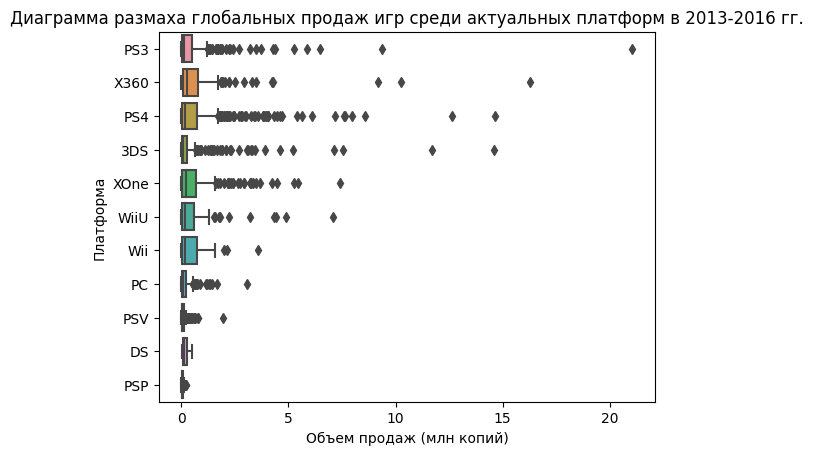

In [30]:
sns.boxplot(x='sum_sales', y='platform', data=df2013)
plt.title('Диаграмма размаха глобальных продаж игр среди актуальных платформ в 2013-2016 гг.');
plt.xlabel('Объем продаж (млн копий)')
plt.ylabel('Платформа');

Рассмотрим диаграмму поближе:

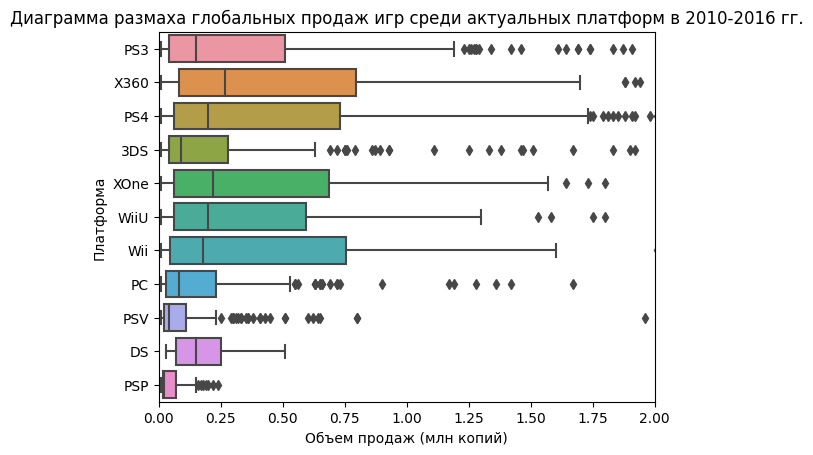

In [31]:
sns.boxplot(x='sum_sales', y='platform', data=df2013)
plt.xlim(0, 2)
plt.title('Диаграмма размаха глобальных продаж игр среди актуальных платформ в 2010-2016 гг.');
plt.xlabel('Объем продаж (млн копий)')
plt.ylabel('Платформа');

Выбросы, ничто иное как игры-хиты.

Выбранные нами ранее, как потенциально прибильные платформы `PS4` и `XOne` очень похожи своими параметрами.

### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между оценкой критиков и продажами на платформе `PS4`:

Коэффициент корреляции Пирсона 0.41


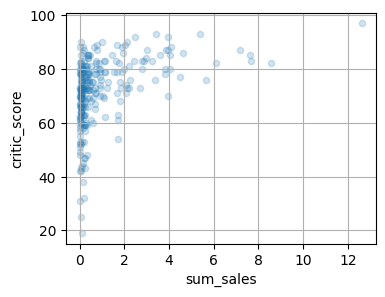

In [32]:
df2013[df2013['platform'] == 'PS4'] \
    .plot(x='sum_sales', 
     y='critic_score', 
     kind='scatter', 
     grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(df2013[df2013['platform'] == 'PS4']['sum_sales'] \
                                        .corr(df2013[df2013['platform'] == 'PS4']['critic_score']), 2))

Построим диаграмму рассеяния и посчитаем корреляцию между оценкой пользователей и продажами на платформе `PS4`:

Коэффициент корреляции Пирсона -0.03


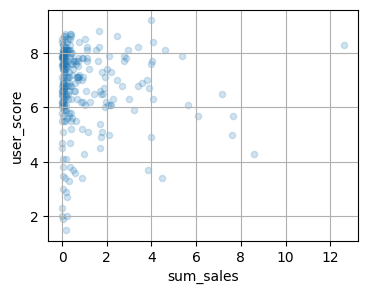

In [33]:
df2013[df2013['platform'] == 'PS4'] \
    .plot(x='sum_sales', 
     y='user_score', 
     kind='scatter', 
     grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(df2013[df2013['platform'] == 'PS4']['sum_sales'] \
                                        .corr(df2013[df2013['platform'] == 'PS4']['user_score']), 2))

**Вывод:** 
- выявлена положительная корреляция между оценкой критиков и продажами;
- оценка пользователей никак не влияет на продажи.

Посчитаем корреляцию Пирсона между оценкой критиков и продажами платформ:

In [34]:
for name in top_platform.index[:8]:
    print(name, "=", round(df2013[df2013['platform'] == name]['sum_sales'] \
                     .corr(df2013[df2013['platform'] == name]['critic_score']), 2))

PS4 = 0.41
PS3 = 0.33
XOne = 0.42
3DS = 0.36
X360 = 0.35
WiiU = 0.38
PC = 0.2
PSV = 0.25


**Вывод:** 
- большая корреляция у `PS4` и `XOne`.
- влияние оценки критиков на продажи игр на `PC` не сильная.

### Посмотрим на общее распределение игр по жанрам

Посчитаем суммарные продажи по жанрам:

In [35]:
df2013.groupby(['genre'])['sum_sales'] \
      .agg(['sum', 'count', 'median']) \
      .sort_values(by='median', ascending=False)

,sum,count,median
genre,,,
Shooter,232.98,187,0.450
Sports,150.65,214,0.240
Platform,42.63,74,0.225
Role-Playing,145.89,292,0.125
Fighting,35.31,80,0.125
Racing,39.89,85,0.120
Action,321.87,766,0.110
Simulation,21.76,62,0.100
Misc,62.82,155,0.100


Топ 3 жанра по суммарным продажам: `Action`, `Shooter`, `Sports` и `Role-Playing`.

В продажи этих жанров входят так же данные выбросы (игры хиты), они искажают результат, здесь лучше всего смотреть на медианую.

Топ 3 жанра по медианной продаж: `Shooter`, `Sports` и `Role-Platform`.

**Вывод:** 
- лучшие продажи в жанрах - Shooter, Sports и Role-Platform;
- больше всего игр в жанрах - Action, Role-Playing и Adventure.

## Составим портрет пользователя каждого региона

NA - Северная Америка, EU - Европа, JP - Япония.

### Самые популярные платформы (топ-5)

In [36]:
NA_top_platforms = df2013.groupby(['platform'])['na_sales'] \
                   .agg(['sum']).sort_values(by='sum', ascending=False) \
                   .reset_index().head(5)
NA_top_platforms['%'] = round(NA_top_platforms['sum'] / df2013['na_sales'].sum() * 100, 2)
NA_top_platforms

,platform,sum,%
0,PS4,108.74,24.84
1,XOne,93.12,21.27
2,X360,81.66,18.66
3,PS3,63.50,14.51
4,3DS,38.20,8.73


In [37]:
EU_top_platforms = df2013.groupby(['platform'])['eu_sales'] \
                   .agg(['sum']).sort_values(by='sum', ascending=False) \
                   .reset_index().head(5)
EU_top_platforms['%'] = round(EU_top_platforms['sum'] / df2013['eu_sales'].sum() * 100, 2)
EU_top_platforms

,platform,sum,%
0,PS4,141.09,35.97
1,PS3,67.81,17.29
2,XOne,51.59,13.15
3,X360,42.52,10.84
4,3DS,30.96,7.89


In [38]:
JP_top_platforms = df2013.groupby(['platform'])['jp_sales'] \
                   .agg(['sum']).sort_values(by='sum', ascending=False) \
                   .reset_index().head(5)
JP_top_platforms['%'] = round(JP_top_platforms['sum'] / df2013['jp_sales'].sum() * 100, 2)
JP_top_platforms

,platform,sum,%
0,3DS,67.81,48.17
1,PS3,23.35,16.59
2,PSV,18.59,13.21
3,PS4,15.96,11.34
4,WiiU,10.88,7.73


**Вывод:** 
- рынок платформ в Северной Америке и Европе очень похож, а вот в Японии лидируют местные игровые платформы.

### Самые популярные жанры (топ-5)

In [39]:
NA_top_genres = df2013.groupby(['genre'])['na_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)
NA_top_genres['%'] = round(NA_top_genres['sum'] / df2013['na_sales'].sum() * 100, 2)
NA_top_genres

,genre,sum,%
0,Action,126.05,28.80
1,Shooter,109.74,25.07
2,Sports,65.27,14.91
3,Role-Playing,46.40,10.60
4,Misc,27.49,6.28


In [40]:
EU_top_genres = df2013.groupby(['genre'])['eu_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)
EU_top_genres['%'] = round(EU_top_genres['sum'] / df2013['eu_sales'].sum() * 100, 2)
EU_top_genres

,genre,sum,%
0,Action,118.13,30.12
1,Shooter,87.86,22.40
2,Sports,60.52,15.43
3,Role-Playing,36.97,9.43
4,Racing,20.19,5.15


In [41]:
JP_top_genres = df2013.groupby(['genre'])['jp_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)
JP_top_genres['%'] = round(JP_top_genres['sum'] / df2013['jp_sales'].sum() * 100, 2)
JP_top_genres

,genre,sum,%
0,Role-Playing,51.04,36.26
1,Action,40.49,28.76
2,Misc,9.20,6.54
3,Fighting,7.65,5.43
4,Shooter,6.61,4.70


**Вывод:** 
- игры определенных жанров в Северной Америке и Европе практически идентичный, а вот в Японии сильно отличается;
- в Северной Америке и Европе больше предпочитают жанры `Action`, `Shooter` и `Sports`;
- в Японии больше продаж в жанрах `Role-Playing`, `Action` и `Misc`.

### Посмотрим влияние рейтинга ESRB на продажи в отдельном регионе

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Посчитаем суммарные продажи по каждому типу рейтинга по регионам:

In [42]:
df2013.groupby(['rating'])['na_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)

,rating,sum
0,M,165.21
1,other,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [43]:
df2013.groupby(['rating'])['eu_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)

,rating,sum
0,M,145.32
1,E,83.36
2,other,78.91
3,E10+,42.69
4,T,41.95


In [44]:
df2013.groupby(['rating'])['jp_sales'] \
                .agg(['sum']).sort_values(by='sum', ascending=False) \
                .reset_index().head(5)

,rating,sum
0,other,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


**Вывод:** 
- в Северной Америке и Европе больше продаж с рейтингом "Для взрослых", "Для всех" и "Для всех от 10 лет и старше";
- в Японии лидируют продажи игр без рейтинга, потом "Подросткам" и "Для всех".

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверка гипотезы:
```
H_0: cредние пользовательские рейтинги (user_score) платформ "Xbox" и "PC" одинаковые
H_a: cредние пользовательские рейтинги (user_score) платформ "Xbox" и "PC" разные
alpha = 0.05
```

Выделим наши выборки в отдельные переменные, очистив их от пропусков:

In [45]:
xone_user_score = df2013[df2013['platform'] =='XOne']['user_score'].dropna()
pc_user_score = df2013[df2013['platform'] =='PC']['user_score'].dropna()

Построим гистограммы наших выборок:

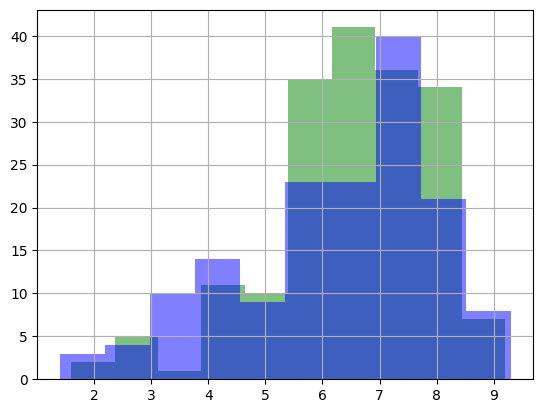

In [46]:
xone_user_score.hist(alpha=0.5, color='green');
pc_user_score.hist(alpha=0.5, color='blue');

In [47]:
xone_user_score.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [48]:
pc_user_score.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости(alpha = 0.05), то нулевую гипотезу о равенстве средних отвергнем.

In [49]:
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вероятность получить различие между выборками ~14.8%, что выше нашего уровная значимости, значит, вероятнее всего cредние пользовательские рейтинги платформ "Xbox" и "PC" одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные

Проверка гипотезы:
```
H_0: cредние пользовательские рейтинг (user_score) жанров "Action" и "Sports" одинаковые
H_a: cредние пользовательские рейтинг (user_score) жанров "Action" и "Sports" разные
alpha = 0.05
```

Выделим наши выборки в отдельные переменные, очистив их от пропусков:

In [50]:
action_user_score = df2013[df2013['genre'] =='Action']['user_score'].dropna()
sports_user_score = df2013[df2013['genre'] =='Sports']['user_score'].dropna()

Построим гистограммы наших выборок:

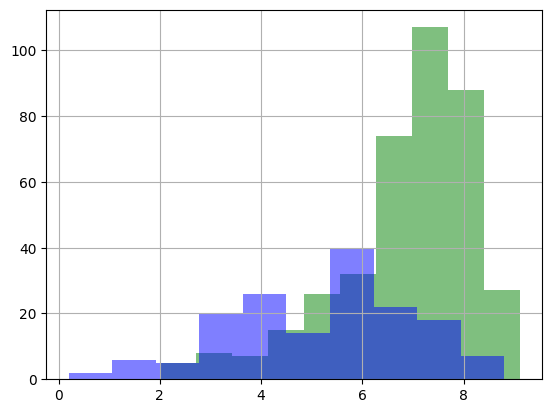

In [51]:
action_user_score.hist(alpha=0.5, color='green');
sports_user_score.hist(alpha=0.5, color='blue');

In [52]:
action_user_score.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [53]:
sports_user_score.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости(alpha = 0.05), то нулевую гипотезу о равенстве средних отвергнем.

In [54]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704318e-20
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего cредние пользовательские рейтинги жанров "Action" и "Sports" разные.

## Общий вывод

Получив данные, нам досталось 16715 строк и 11 столбцов. Мы изучили их и нашли пропущенные значения в столбцах, изменили типы данных столбцов, где это требуется. Создали новый столбец, посчитали и добавили интересующий нас параметр. Взяли нужный нам период времени, для прогноза на 2017 год, и у нас осталось 2233 строк.

**Проведя исследование, мы выявили:**
- прибыльные платформы можно считать `PS4`, `XOne` и `PC`;
- положительная корреляция между оценкой критиков `Critic_score` и продажами;
- оценка пользователей `User_score` никак не влияет на продажи;
- лучшие продажи в жанрах - `Shooter`, `Sports` и `Role-Platform`;
- рынок платформ в Северной Америке и Европе очень похож, а вот в Японии лидируют местные игровые платформы;
- игры определенных жанров в Северной Америке и Европе практически идентичный, а вот в Японии сильно отличается;
- в Северной Америке и Европе больше предпочитают жанры `Action`, `Shooter` и `Sports`;
- в Японии больше продаж в жанрах `Role-Playing`, `Action` и `Misc`;
- в Северной Америке и Европе больше продаж с рейтингом "Для взрослых", "Для всех" и "Для всех от 10 лет и старше";
- в Японии лидируют продажи игр без рейтинга, потом "Подросткам" и "Для всех";
- вероятнее всего cредние пользовательские рейтинги платформ "Xbox" и "PC" одинаковые;
- вероятнее всего cредние пользовательские рейтинги жанров "Action" и "Sports" разные.